# STEP 1: Assigning Product Names

In [1]:
import pandas as pd
import random

# Load your dataset
df = pd.read_csv("/Users/vamshisaini/Masters/Spring 2025/Machine Learning/Project/train.csv")

# Get unique item IDs
unique_items = df['item'].unique()

# List of 50 unique Bourbon whiskey names
bourbon_whiskeys = [
    "Buffalo Trace", "Blanton's", "Eagle Rare", "Elijah Craig", "Maker's Mark",
    "Knob Creek", "Woodford Reserve", "Wild Turkey", "Old Forester", "Bulleit",
    "Four Roses", "1792 Ridgemont", "Basil Hayden's", "Booker's", "Old Grand-Dad",
    "Angel's Envy", "Weller Special Reserve", "Henry McKenna", "Rebel Yell", "Jim Beam",
    "Heaven Hill", "Old Ezra", "Town Branch", "Willett Pot Still", "Michter’s US*1",
    "Jefferson’s Reserve", "Old Bardstown", "Pappy Van Winkle", "Baker's", "Very Old Barton",
    "Cedar Ridge", "John J. Bowman", "Russell’s Reserve", "Calumet Farm", "Rowan’s Creek",
    "Fighting Cock", "Larceny", "David Nicholson", "Elmer T. Lee", "Noah’s Mill",
    "Kentucky Owl", "Old Medley", "Barrell Bourbon", "Cyrus Noble", "Kentucky Vintage",
    "Ezra Brooks", "Davidson Reserve", "Johnny Drum", "Old Crow", "King’s County"
]

# Shuffle the bourbon names to ensure random assignment
random.shuffle(bourbon_whiskeys)

# Create a DataFrame mapping item IDs to bourbon names
products_df = pd.DataFrame({
    'product_id': unique_items,
    'product_name': bourbon_whiskeys[:len(unique_items)]
})

# View the resulting mapping
print(products_df.head())

# products_df.to_csv("products_table.csv", index=False)

   product_id    product_name
0           1     Johnny Drum
1           2  John J. Bowman
2           3   Fighting Cock
3           4   Rowan’s Creek
4           5   Old Grand-Dad


# STEP 2: Creating 10 mock sales reps

In [2]:
import pandas as pd
import random

salesrep_ids = list(range(1, 11))
salesrep_names = [
    "Alex Morgan", "Jamie Lee", "Taylor Jordan", "Riley Bennett", "Casey Harper",
    "Morgan Quinn", "Avery Blake", "Jordan Parker", "Skyler Monroe", "Drew Kendall"
]
# Remove any special characters from names
salesrep_names = [name.replace("'", "").replace("-", "") for name in salesrep_names]
# Generating safe email addresses
salesrep_emails = [name.lower().replace(" ", ".") + "@sainibrewing.com" for name in salesrep_names]

sales_reps_df = pd.DataFrame({
    'salesrep_id': salesrep_ids,
    'name': salesrep_names,
    'email': salesrep_emails,
    'phone': '6166136151'
})

#sales_reps_df.to_csv("sales_reps_table.csv", index=False)

print("Sales Reps Table:")
print(sales_reps_df.head())

Sales Reps Table:
   salesrep_id           name                           email       phone
0            1    Alex Morgan    alex.morgan@sainibrewing.com  6166136151
1            2      Jamie Lee      jamie.lee@sainibrewing.com  6166136151
2            3  Taylor Jordan  taylor.jordan@sainibrewing.com  6166136151
3            4  Riley Bennett  riley.bennett@sainibrewing.com  6166136151
4            5   Casey Harper   casey.harper@sainibrewing.com  6166136151


# STEP 3: Creating Stores Table

In [3]:
import pandas as pd
import numpy as np
import random
df = pd.read_csv("/Users/vamshisaini/Masters/Spring 2025/Machine Learning/Project/train.csv")
unique_stores = df['store'].unique()
store_names = [f"Store_{i}" for i in unique_stores]  # Use underscore instead of #
locations = [f"City_{chr(65 + (i % 26))}" for i in range(len(unique_stores))]

# Randomly assign sales reps to each store
assigned_reps = np.random.choice(salesrep_ids, size=len(unique_stores), replace=True)

stores_df = pd.DataFrame({
    'store_id': unique_stores,
    'store_name': store_names,
    'location': locations,
    'salesrep_id': assigned_reps
})

#stores_df.to_csv("stores_table.csv", index=False)

print("\nStores Table:")
print(stores_df.head())


Stores Table:
   store_id store_name location  salesrep_id
0         1    Store_1   City_A            7
1         2    Store_2   City_B            4
2         3    Store_3   City_C            3
3         4    Store_4   City_D            4
4         5    Store_5   City_E            1


# Connecting and Importing dataframes to database.

In [15]:
import pandas as pd
from sqlalchemy import create_engine
import mysql.connector

# MySQL credentials
username = 'root'
password = 'Application@123'  # raw password for mysql.connector
encoded_password = 'Application%40123'  # URL-encoded for SQLAlchemy
host = 'localhost'
port = 3306

# Step 1: Create database using mysql.connector
conn = mysql.connector.connect(
    host=host,
    user=username,
    password=password
)
cursor = conn.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS Saini_Distributions")
conn.commit()
cursor.close()
conn.close()

# Step 2: Create SQLAlchemy engine for the new database
engine = create_engine(f"mysql+mysqlconnector://{username}:{encoded_password}@{host}:{port}/Saini_Distributions")

# Step 3: Load CSVs
products_df = pd.read_csv("products_table.csv")
sales_reps_df = pd.read_csv("sales_reps_table.csv")
stores_df = pd.read_csv("stores_table.csv")

# Step 4: Upload to MySQL tables
products_df.to_sql("products", con=engine, if_exists="replace", index=False)
sales_reps_df.to_sql("sales_reps", con=engine, if_exists="replace", index=False)
stores_df.to_sql("stores", con=engine, if_exists="replace", index=False)

print("All tables have been successfully saved in the 'Saini_Distributions' database.")


All tables have been successfully saved in the 'Saini_Distributions' database.


# Exploratory Data Analysis.

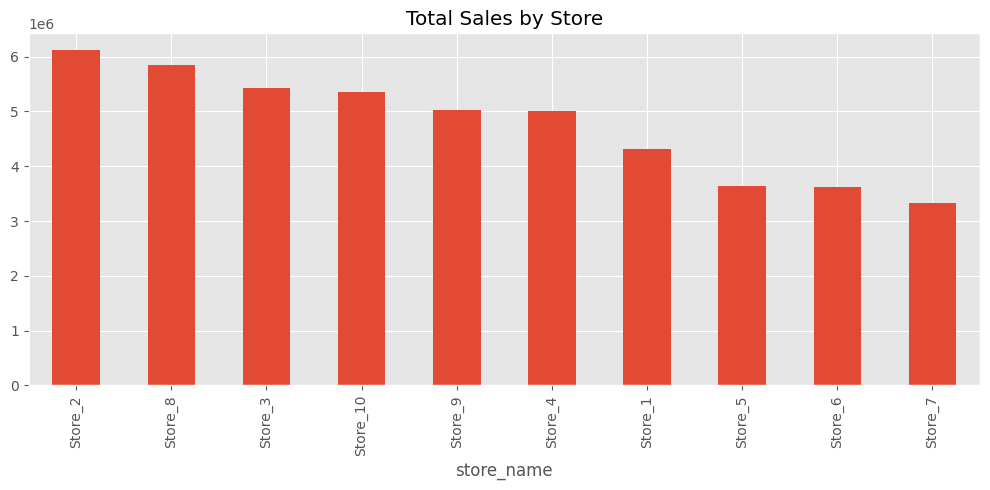

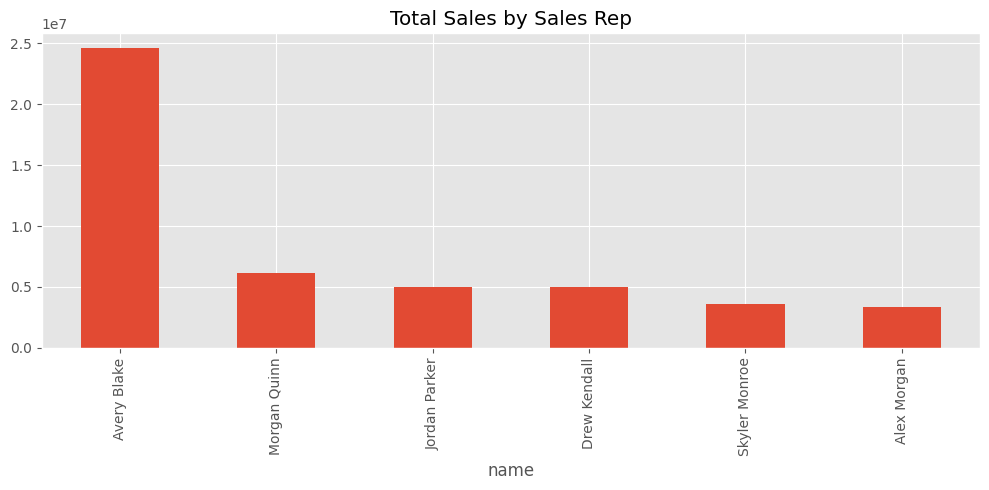

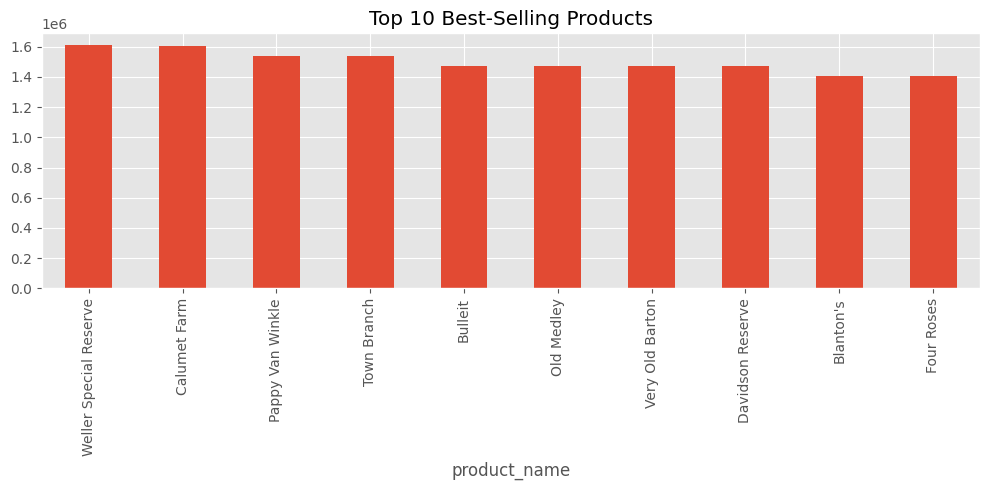

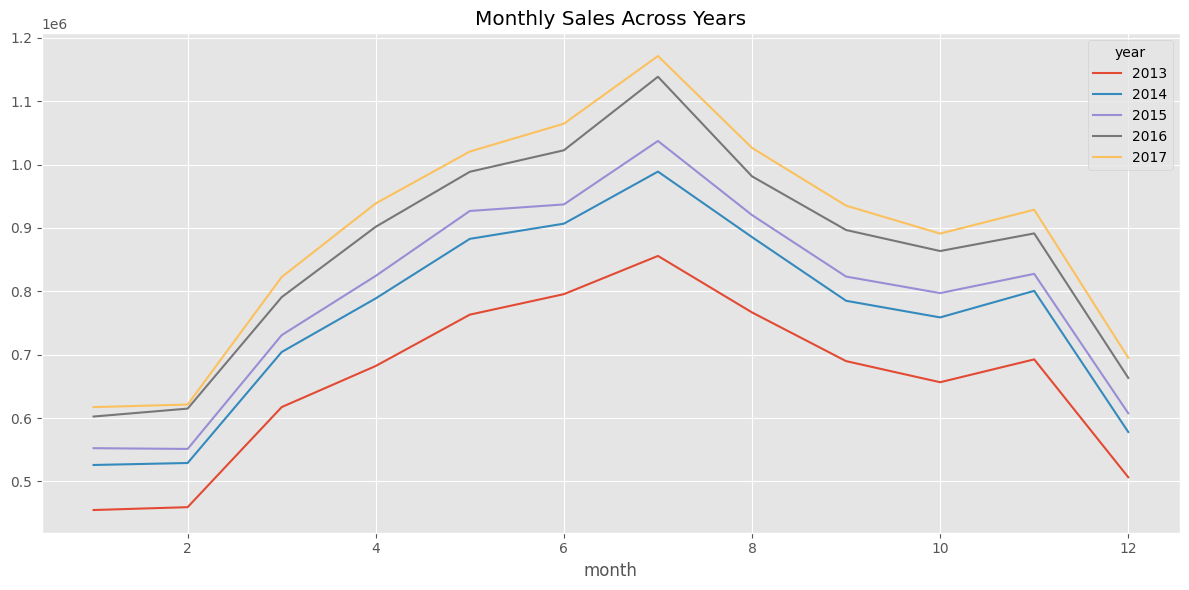

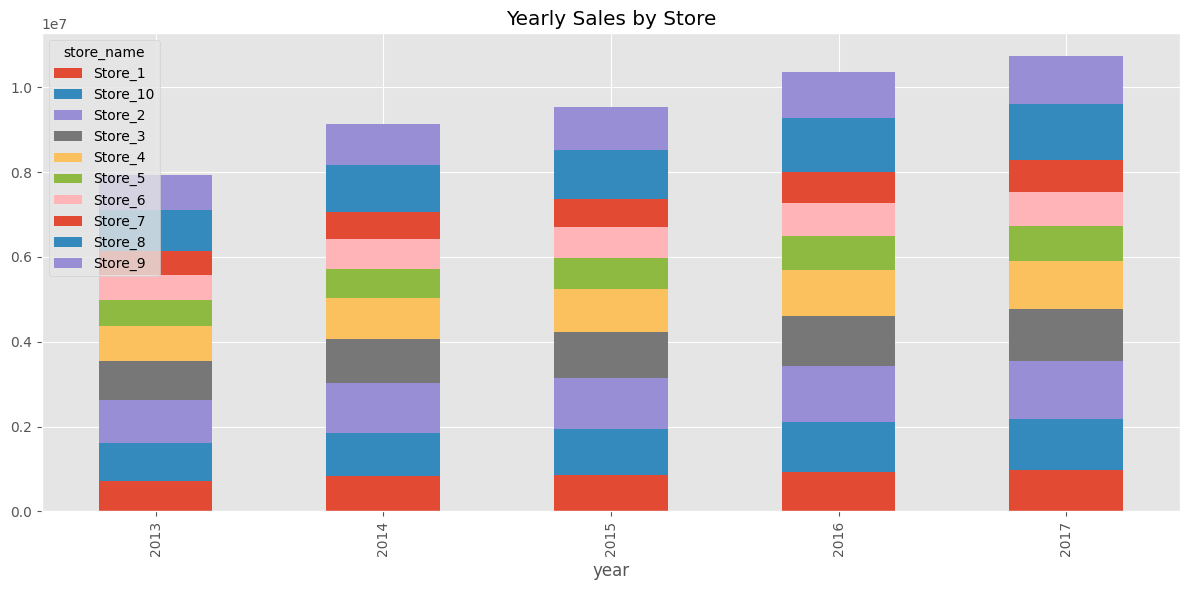

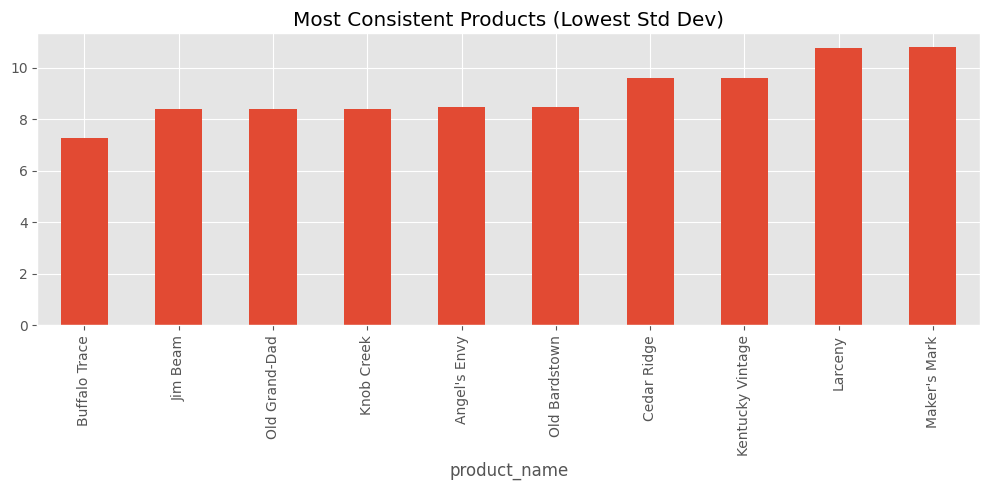

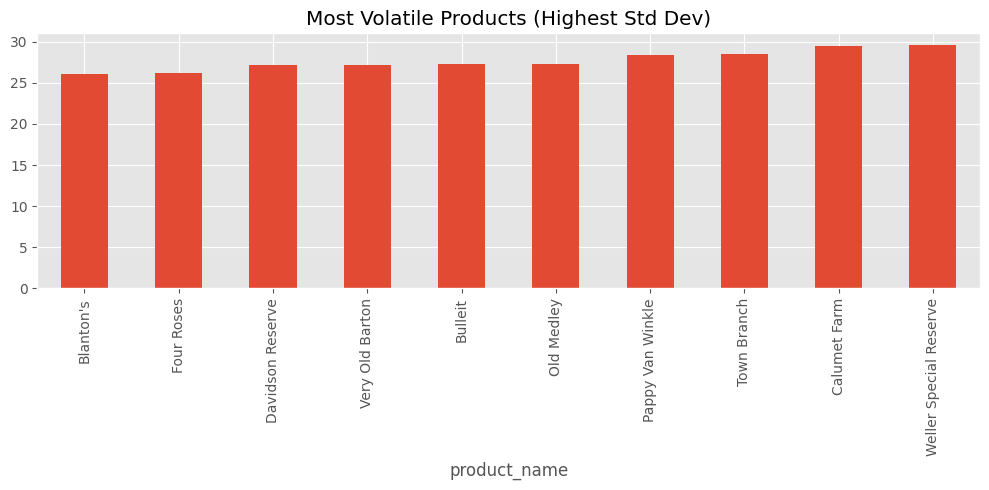

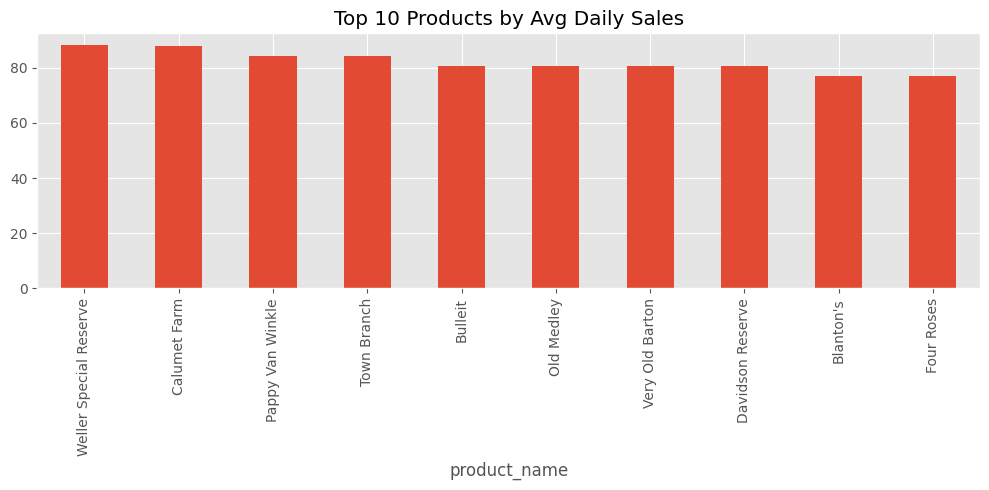

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
sales_df = pd.read_csv("train.csv", parse_dates=['date'])
products_df = pd.read_csv("products_table.csv")
stores_df = pd.read_csv("stores_table.csv")
sales_reps_df = pd.read_csv("sales_reps_table.csv")

# Merge datasets
merged_df = pd.merge(sales_df, products_df, left_on='item', right_on='product_id', how='left')
merged_df = pd.merge(merged_df, stores_df, left_on='store', right_on='store_id', how='left')
merged_df = pd.merge(merged_df, sales_reps_df, on='salesrep_id', how='left', suffixes=('', '_rep'))
merged_df.drop(columns=['product_id', 'store_id'], inplace=True)

# Create time features
merged_df['year'] = merged_df['date'].dt.year
merged_df['month'] = merged_df['date'].dt.month
merged_df['day'] = merged_df['date'].dt.day
merged_df['day_of_week'] = merged_df['date'].dt.dayofweek

# Set plot style
plt.style.use('ggplot')

# EDA: Calculations
sales_by_store = merged_df.groupby('store_name')['sales'].sum().sort_values(ascending=False)
sales_by_rep = merged_df.groupby('name')['sales'].sum().sort_values(ascending=False)
top_products = merged_df.groupby('product_name')['sales'].sum().sort_values(ascending=False)
monthly_sales = merged_df.groupby(['year', 'month'])['sales'].sum().unstack(level=0)
yearly_sales_by_store = merged_df.groupby(['year', 'store_name'])['sales'].sum().unstack()

product_sales_std = merged_df.groupby('product_name')['sales'].std().sort_values()
most_consistent_products = product_sales_std.head(10)
most_volatile_products = product_sales_std.tail(10)
avg_daily_sales_product = merged_df.groupby('product_name')['sales'].mean().sort_values(ascending=False)

# Plotting (selected)
sales_by_store.plot(kind='bar', figsize=(10, 5), title='Total Sales by Store')
plt.tight_layout(); plt.show()

sales_by_rep.plot(kind='bar', figsize=(10, 5), title='Total Sales by Sales Rep')
plt.tight_layout(); plt.show()

top_products.head(10).plot(kind='bar', figsize=(10, 5), title='Top 10 Best-Selling Products')
plt.tight_layout(); plt.show()

monthly_sales.plot(figsize=(12, 6), title='Monthly Sales Across Years')
plt.tight_layout(); plt.show()

yearly_sales_by_store.plot(kind='bar', stacked=True, figsize=(12, 6), title='Yearly Sales by Store')
plt.tight_layout(); plt.show()

most_consistent_products.plot(kind='bar', figsize=(10, 5), title='Most Consistent Products (Lowest Std Dev)')
plt.tight_layout(); plt.show()

most_volatile_products.plot(kind='bar', figsize=(10, 5), title='Most Volatile Products (Highest Std Dev)')
plt.tight_layout(); plt.show()

avg_daily_sales_product.head(10).plot(kind='bar', figsize=(10, 5), title='Top 10 Products by Avg Daily Sales')
plt.tight_layout(); plt.show()

# Save merged data
merged_df.to_csv("merged_sales_data.csv", index=False)






# Feature Engineering

In [21]:
import pandas as pd

# Load your merged sales dataset
merged_df = pd.read_csv("merged_sales_data.csv", parse_dates=["date"])

# Copy to preserve original
feature_df = merged_df.copy()

# Step 1: Time-based features
feature_df['day_of_week'] = feature_df['date'].dt.dayofweek.astype('category')  # Monday = 0
feature_df['month'] = feature_df['date'].dt.month.astype('category')

# Step 2: Sort data to prepare for lag/rolling features
feature_df.sort_values(by=['store', 'item', 'date'], inplace=True)

# Step 3: Lag features (previous day and previous week sales)
feature_df['lag_1'] = feature_df.groupby(['store', 'item'])['sales'].shift(1)
feature_df['lag_7'] = feature_df.groupby(['store', 'item'])['sales'].shift(7)

# Step 4: Rolling statistics (7-day window, excluding current day)
feature_df['rolling_mean_7'] = (
    feature_df.groupby(['store', 'item'])['sales']
    .transform(lambda x: x.shift(1).rolling(window=7).mean())
)

feature_df['rolling_std_7'] = (
    feature_df.groupby(['store', 'item'])['sales']
    .transform(lambda x: x.shift(1).rolling(window=7).std())
)

# Step 5: One-hot encode categorical features
feature_df = pd.get_dummies(
    feature_df,
    columns=['month', 'day_of_week', 'store_name', 'product_name', 'name'],  # sales rep name
    drop_first=True  # optional: drop first to avoid dummy variable trap
)

# Step 6: Drop rows with NaNs created from lag/rolling features
feature_df.dropna(inplace=True)

# Optional: Save the final dataset
# feature_df.to_csv("feature_engineered_sales.csv", index=False)

# Preview
feature_df.head()

# Saving
feature_df.to_csv("post_feature_engineering_data.csv", index=False)


# Model Building

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

# Load data
sales_df = pd.read_csv("train.csv", parse_dates=['date'])
products_df = pd.read_csv("products_table.csv")
stores_df = pd.read_csv("stores_table.csv")
sales_reps_df = pd.read_csv("sales_reps_table.csv")

# Merge all datasets
merged_df = sales_df.merge(products_df, left_on='item', right_on='product_id', how='left')
merged_df = merged_df.merge(stores_df, left_on='store', right_on='store_id', how='left')
merged_df = merged_df.merge(sales_reps_df, on='salesrep_id', how='left', suffixes=('', '_rep'))
merged_df.drop(columns=['product_id', 'store_id'], inplace=True)
merged_df.sort_values(by=['store', 'item', 'date'], inplace=True)

# Create target: sales for next 7 days
merged_df['target_sales_next_7_days'] = (
    merged_df.groupby(['store', 'item'])['sales']
    .transform(lambda x: x.shift(-1).rolling(window=7).sum())
)

# Create lag and rolling features
merged_df['lag_1'] = merged_df.groupby(['store', 'item'])['sales'].shift(1)
merged_df['lag_7'] = merged_df.groupby(['store', 'item'])['sales'].shift(7)
merged_df['lag_14'] = merged_df.groupby(['store', 'item'])['sales'].shift(14)
merged_df['rolling_mean_7'] = merged_df.groupby(['store', 'item'])['sales'].transform(lambda x: x.shift(1).rolling(7).mean())
merged_df['rolling_std_7'] = merged_df.groupby(['store', 'item'])['sales'].transform(lambda x: x.shift(1).rolling(7).std())

# Add time features
merged_df['week'] = merged_df['date'].dt.isocalendar().week.astype(int)
merged_df['month'] = merged_df['date'].dt.month.astype('category')
merged_df['day_of_week'] = merged_df['date'].dt.dayofweek.astype('category')

# One-hot encode categorical columns
weekly_df_encoded = pd.get_dummies(
    merged_df,
    columns=['month', 'day_of_week', 'store_name', 'product_name', 'name'],
    drop_first=True
)

# Drop rows with NaNs from shifting
weekly_df_encoded.dropna(subset=[
    'target_sales_next_7_days', 'lag_1', 'lag_7', 'lag_14',
    'rolling_mean_7', 'rolling_std_7'
], inplace=True)

# Prepare features and target
X = weekly_df_encoded.drop(columns=['sales', 'target_sales_next_7_days', 'date', 'email', 'phone', 'location'])
y = weekly_df_encoded['target_sales_next_7_days']

# Split the data (time-aware)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
}

# Train and evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = mean_squared_error(y_test, preds) ** 0.5
    mape = np.mean(np.abs((y_test - preds) / y_test)) * 100
    results.append((name, mae, rmse, mape))

# Show results
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "MAPE"])
print(results_df)



               Model        MAE       RMSE      MAPE
0  Linear Regression  11.257812  14.644331  3.192523
1      Random Forest  11.224861  14.545491  3.180363
2            XGBoost  10.737378  13.924908  3.045526


# Model saving and Actual vs Predictions

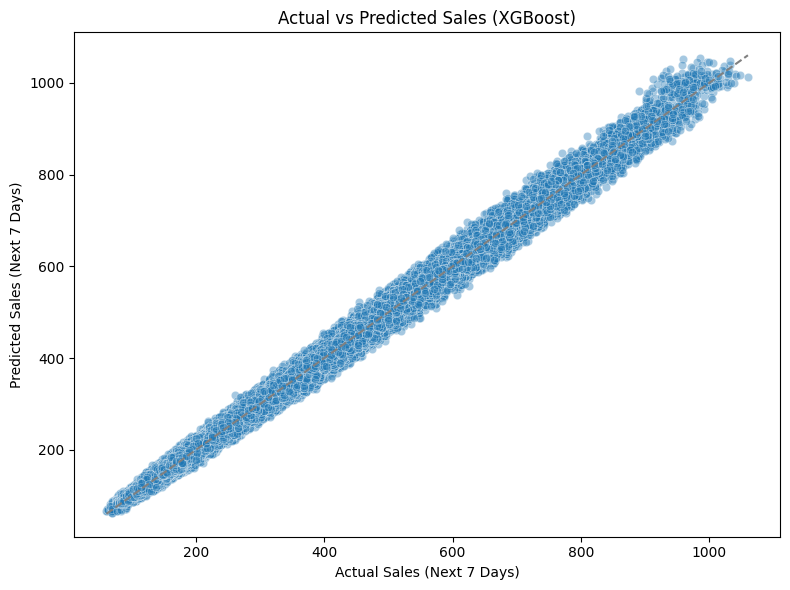

In [5]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle



# Assuming X and y already exist
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

best_model = xgb.XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.xlabel("Actual Sales (Next 7 Days)")
plt.ylabel("Predicted Sales (Next 7 Days)")
plt.title("Actual vs Predicted Sales (XGBoost)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.tight_layout()
plt.show()

with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(best_model, f)